# Angewandtes Finden von maximalen Flüssen und deren Visualisierung

# Studierendenprojekte

### Studierende $S = \{S_1, \dots, S_n\}$ mit jeweils genau einem Projekt
### Professoren $P = \{P_1, \dots, P_k\}$
### Für jedes Projekt ist ein Prof. entweder Spezialist oder nicht:
### $\forall i=1,\dots,n: P$ partitioniert in $Sp_i$ und $NSp_i$
### Jeder Prof. $P_j$ kann an höchstens $a_j$ Verteidigungen teilnehmen.
### Jeder Studierende stellt sein Projekt vor genau $x$ Profs. vor, die alle Spezialisten sein müssen.

### Organisiere die Jury.

### Modelliere dieses Problem zunächst als Flussnetzwerk auf Papier.
### Implementiere und visualisiere danach.

In [52]:
import networkx as nx
import numpy as np

In [62]:
np.random.seed(0)
x = 1 #Anzahl der Projekte pro Stud
n = 8 #Anzahl Studierende
k = 3 #Anzahl Profs
_p_spec = 0.5 #Wahrscheinlichkeit, dass ein Prof für ein Projekt Spezialist ist
#spec[i] = Menge der Profs, die Spezialisten für Projekt i sind
spec = [[j for j in range(k) if np.random.random() < _p_spec] for i in range(n)]
#maximale Auslastung der Profs
prof_max = [np.random.randint(4)+1 for j in range(k)]

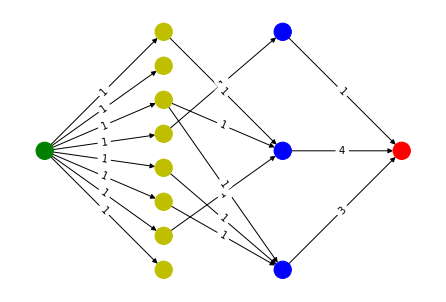

In [68]:
source = 0
student_nodes = list(range(1,n+1))
prof_nodes = list(range(n+1, n+k+1))
sink = n+k+1

G = nx.DiGraph()
G.add_node(source) #source
G.add_nodes_from(student_nodes) #students
G.add_nodes_from(prof_nodes) #profs
G.add_node(sink) #sink 

#edges from source to students
G.add_edges_from([(source, i) for i in student_nodes], capacity=x)

#add bipartite edges
G.add_edges_from([(i+1, n+1+j) for i in range(n) for j in spec[i]], capacity=1)

#edges from profs to sink
for j, a in zip(prof_nodes, prof_max):
    G.add_edge(j, sink, capacity=a)

lin_stud = np.linspace(0,1,n)
lin_prof = np.linspace(0,1,k)
pos = {source : (0, 0.5), sink : (3, 0.5)}
pos.update({i : (1,lin_stud[ni]) for ni,i in enumerate(student_nodes)})
pos.update({j : (2, lin_prof[nj]) for nj,j in enumerate(prof_nodes)})

col = {source : "g", sink : "r"}
col.update({i : "y" for i in student_nodes})
col.update({j : "b" for j in prof_nodes})
col = list([col[x] for x in G.nodes])

edge_labels = {e : str(c) for e,c in nx.get_edge_attributes(G, "capacity").items()}

nx.draw(G, pos=pos, node_color=col)
_ = nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

Wert eines maximalen Flusses:  6


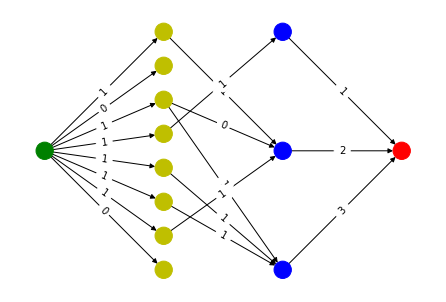

In [69]:
R = nx.algorithms.flow.edmonds_karp(G, source, sink)
print("Wert eines maximalen Flusses: ", R.graph['flow_value'])
nx.draw(G, pos=pos, node_color=col)
edge_labels = {e : str(-f) for e,f in nx.get_edge_attributes(R, "flow").items()}
_=nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

### Finden eines min cut:

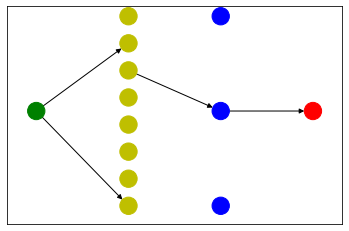

In [70]:
r_flow = nx.get_edge_attributes(R, "flow").items()
r_cap = nx.get_edge_attributes(R, "capacity").items()

edges = []
for (e, f), (_, c) in zip(r_flow, r_cap):
    if f < c and e in G.edges:
        edges.append(e)
        
G_2 = nx.edge_subgraph(G, edges)
        
#reachability to t in G using only edges (u, v) such that R[u][v]['flow'] < R[u][v]['capacity'] induces a minimum s-t cut
    
nx.draw_networkx_nodes(G, pos=pos, node_color=col)
_=nx.draw_networkx_edges(G_2, pos=pos)